In [1]:
conversion = {'a':1, 'b':2, 'c':3, 'd':4, 'e':5, 'f':6, 'g': 7, 'h':8, 'i':9, 'j':10, 'k':11, 'l':12, 'm':13, 'n':14, 'o':15, \
           'p':16, 'q':17, 'r':18, 's':19, 't':20, 'u':21, 'v':22, 'w':23, 'x':24, 'y':25, 'z':26, '?':0}

This was part of a Kaggle Competition. The dataset came from UC Irvine.
https://www.kaggle.com/uciml/mushroom-classification

To see other solutions: https://www.kaggle.com/uciml/mushroom-classification/kernels

In [2]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
dataset = pd.read_csv('mushrooms.csv')

In [38]:
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [59]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
cap-shape                   8124 non-null int64
cap-surface                 8124 non-null int64
cap-color                   8124 non-null int64
bruises                     8124 non-null int64
odor                        8124 non-null int64
gill-attachment             8124 non-null int64
gill-spacing                8124 non-null int64
gill-size                   8124 non-null int64
gill-color                  8124 non-null int64
stalk-shape                 8124 non-null int64
stalk-root                  8124 non-null int64
stalk-surface-above-ring    8124 non-null int64
stalk-surface-below-ring    8124 non-null int64
stalk-color-above-ring      8124 non-null int64
stalk-color-below-ring      8124 non-null int64
veil-type                   8124 non-null int64
veil-color                  8124 non-null int64
ring-number                 8124 non-null int64
ring-type                   8

In [7]:
#function for y data

def y_convert(label):
    if label == 'p':
        return 0
    else:
        return 1

In [8]:
# function to substitute letters for numbers

def letter_to_number(letter):
    return conversion[letter]


Also found out I could have used LabelEncoder from sklearn to convert letters to numbers

In [40]:
dataset['class'] = dataset['class'].apply(y_convert)
y = dataset['class']

In [42]:
dataset = dataset.drop('class',1) # 1 is axis number, 0 for rows and 1 for column

In [43]:
dataset.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [44]:
#Converts all letters to numbers based upon dictionary. 

for column in dataset:
    dataset[column] = dataset[column].apply(letter_to_number)

In [45]:
dataset.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,24,19,14,20,16,6,3,14,11,5,...,19,23,23,16,23,15,16,11,19,21
1,24,19,25,20,1,6,3,2,11,5,...,19,23,23,16,23,15,16,14,14,7
2,2,19,23,20,12,6,3,2,14,5,...,19,23,23,16,23,15,16,14,14,13
3,24,25,23,20,16,6,3,14,14,5,...,19,23,23,16,23,15,16,11,19,21
4,24,19,7,6,14,6,23,2,11,20,...,19,23,23,16,23,15,5,14,1,7


In [47]:
X = dataset

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=3)

In [49]:
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(4874, 22)
(3250, 22)
(4874L,)
(3250L,)


In [50]:
rfc = RandomForestClassifier()

In [51]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [52]:
rfc_predict = rfc.predict(X_test)

In [53]:
print(classification_report(y_test, rfc_predict))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1541
          1       1.00      1.00      1.00      1709

avg / total       1.00      1.00      1.00      3250



In [62]:
score = rfc.score(X_test, y_test)

In [64]:
print ("The accuracy of the Random Forest Classifier is {}%".format(score*100))

The accuracy of the Random Forest Classifier is 100.0%


What are some of the significant factors that determined results?

In [65]:
importances = rfc.feature_importances_

In [70]:
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],axis=0)
             
indices = np.argsort(importances)[::-1]

In [74]:
# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 8 (0.203871)
2. feature 4 (0.111663)
3. feature 20 (0.081479)
4. feature 19 (0.074492)
5. feature 7 (0.073101)
6. feature 11 (0.063086)
7. feature 10 (0.059819)
8. feature 18 (0.059601)
9. feature 12 (0.055539)
10. feature 3 (0.042392)
11. feature 21 (0.030988)
12. feature 6 (0.028224)
13. feature 17 (0.024982)
14. feature 13 (0.021943)
15. feature 2 (0.017541)
16. feature 14 (0.017089)
17. feature 9 (0.012283)
18. feature 1 (0.009328)
19. feature 0 (0.009154)
20. feature 16 (0.003424)
21. feature 15 (0.000000)
22. feature 5 (0.000000)


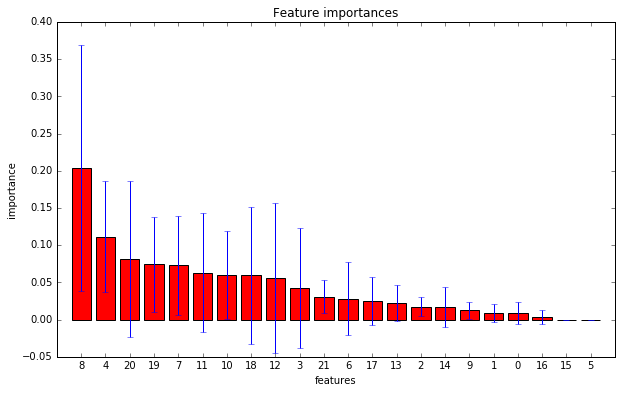

In [81]:
# Plot the feature importances of the forest
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.xlabel('features')
plt.ylabel('importance')
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [12]:
for column in dataset:
    print column

cap-shape
cap-surface
cap-color
bruises
odor
gill-attachment
gill-spacing
gill-size
gill-color
stalk-shape
stalk-root
stalk-surface-above-ring
stalk-surface-below-ring
stalk-color-above-ring
stalk-color-below-ring
veil-type
veil-color
ring-number
ring-type
spore-print-color
population
habitat


In [5]:
y = dataset['class']


In [6]:
y.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

In [7]:
def y_convert(label):
    if label == 'p':
        return 0
    else:
        return 1

In [8]:
y_convert('p')

0

In [13]:
dataset['y_class'] = dataset['class'].apply(y_convert)

In [14]:
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,y_class
0,p,x,s,n,t,p,f,c,n,k,...,w,w,p,w,o,p,k,s,u,0
1,e,x,s,y,t,a,f,c,b,k,...,w,w,p,w,o,p,n,n,g,1
2,e,b,s,w,t,l,f,c,b,n,...,w,w,p,w,o,p,n,n,m,1
3,p,x,y,w,t,p,f,c,n,n,...,w,w,p,w,o,p,k,s,u,0
4,e,x,s,g,f,n,f,w,b,k,...,w,w,p,w,o,e,n,a,g,1


In [16]:
dataset['class'] = dataset['class'].apply(y_convert)


In [17]:
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,y_class
0,0,x,s,n,t,p,f,c,n,k,...,w,w,p,w,o,p,k,s,u,0
1,1,x,s,y,t,a,f,c,b,k,...,w,w,p,w,o,p,n,n,g,1
2,1,b,s,w,t,l,f,c,b,n,...,w,w,p,w,o,p,n,n,m,1
3,0,x,y,w,t,p,f,c,n,n,...,w,w,p,w,o,p,k,s,u,0
4,1,x,s,g,f,n,f,w,b,k,...,w,w,p,w,o,e,n,a,g,1


In [9]:
dataset['class'].head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

In [10]:
word = 'cba'
word

'cba'

In [15]:
for letter in word:
    print conversion[letter]

3
2
1


In [ ]:
try = {}

In [18]:
def letter_to_number(letter):
    return conversion[letter]

In [24]:
dataset['cap-shape']

0       24
1       24
2        2
3       24
4       24
5       24
6        2
7        2
8       24
9        2
10      24
11      24
12       2
13      24
14      24
15      19
16       6
17      24
18      24
19      24
20       2
21      24
22       2
23       2
24       2
25       6
26      24
27      24
28       6
29      24
        ..
8094     2
8095    24
8096    11
8097    11
8098    11
8099    11
8100     6
8101    11
8102    24
8103    11
8104    11
8105    11
8106    11
8107    24
8108    11
8109     2
8110    24
8111    11
8112    11
8113    11
8114     6
8115    24
8116    11
8117    11
8118    11
8119    11
8120    24
8121     6
8122    11
8123    24
Name: cap-shape, dtype: int64

In [21]:
dataset['cap-shape'] = dataset['cap-shape'].apply(letter_to_number)

In [22]:
dataset['cap-shape']

0       24
1       24
2        2
3       24
4       24
5       24
6        2
7        2
8       24
9        2
10      24
11      24
12       2
13      24
14      24
15      19
16       6
17      24
18      24
19      24
20       2
21      24
22       2
23       2
24       2
25       6
26      24
27      24
28       6
29      24
        ..
8094     2
8095    24
8096    11
8097    11
8098    11
8099    11
8100     6
8101    11
8102    24
8103    11
8104    11
8105    11
8106    11
8107    24
8108    11
8109     2
8110    24
8111    11
8112    11
8113    11
8114     6
8115    24
8116    11
8117    11
8118    11
8119    11
8120    24
8121     6
8122    11
8123    24
Name: cap-shape, dtype: int64

In [27]:
for column in dataset:
    print column

class
cap-shape
cap-surface
cap-color
bruises
odor
gill-attachment
gill-spacing
gill-size
gill-color
stalk-shape
stalk-root
stalk-surface-above-ring
stalk-surface-below-ring
stalk-color-above-ring
stalk-color-below-ring
veil-type
veil-color
ring-number
ring-type
spore-print-color
population
habitat
y_class


In [18]:
dataset.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,24,19,14,20,16,6,3,14,11,5,...,s,w,w,p,w,o,p,k,s,u
1,24,19,25,20,1,6,3,2,11,5,...,s,w,w,p,w,o,p,n,n,g
2,2,19,23,20,12,6,3,2,14,5,...,s,w,w,p,w,o,p,n,n,m
3,24,25,23,20,16,6,3,14,14,5,...,s,w,w,p,w,o,p,k,s,u
4,24,19,7,6,14,6,23,2,11,20,...,s,w,w,p,w,o,e,n,a,g


In [29]:
dataset['stalk-root']

0       e
1       c
2       c
3       e
4       e
5       c
6       c
7       c
8       e
9       c
10      c
11      c
12      c
13      e
14      e
15      e
16      e
17      e
18      e
19      e
20      c
21      e
22      c
23      c
24      c
25      e
26      c
27      c
28      e
29      b
       ..
8094    ?
8095    c
8096    ?
8097    ?
8098    ?
8099    ?
8100    ?
8101    ?
8102    ?
8103    ?
8104    ?
8105    ?
8106    ?
8107    ?
8108    ?
8109    ?
8110    ?
8111    ?
8112    ?
8113    ?
8114    c
8115    ?
8116    ?
8117    ?
8118    ?
8119    ?
8120    ?
8121    ?
8122    ?
8123    ?
Name: stalk-root, dtype: object